In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("imported libraries")

imported libraries


In [16]:
#importing the dataset
data = pd.read_csv(r"C:\Users\ASUS\Desktop\Machine Learning\LinearReg\linear_regression_dataset.csv")
df = pd.DataFrame(data)
print("imported dataset")

imported dataset
Total number of samples: 500
Shape of X_final: (500, 5)
Shape of Y: (499, 1)


In [23]:
df = data[['AGE', 'FEMALE', 'LOS', 'APRDRG', 'TOTCHG']].copy()

#Dropping empty columns
df.dropna(inplace=True) 

X = df[['AGE', 'FEMALE', 'LOS', 'APRDRG']].values
#dropping 'RACE' column due to homogeneity(no variance).

Y = np.log(df['TOTCHG']).values.reshape(-1, 1)
N = len(X) 

def standardize(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_std[X_std == 0] = 1  #To avoid division by 0
    X_norm = (X - X_mean) / X_std
    return X_norm, X_mean, X_std

X_scaled, X_mean, X_std = standardize(X)

X_final = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

def train_test_split(X, Y, test_size=0.2, random_state= 1001):
    np.random.seed(random_state)
    N = len(X)
    indices = np.arange(N)
    shuffled_indices = np.random.permutation(indices)
    test_set_size = int(N * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices], X[test_indices], Y[train_indices], Y[test_indices]

X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.2)

print("Data Pre-Processing Done")

Data Pre-Processing Done


In [30]:
#Logistic regression
theta = 1
def hypothesis(X, theta):
    return X.dot(theta)

def cost_function(X, Y, theta):
    m = len(Y)
    pred = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum(np.square(pred - Y))
    return cost

def gradient_descent_step(X, Y, theta, learning_rate):
    m = len(Y)
    pred = hypothesis(X, theta)
    errors = pred - Y
    gradients = (1 / m) * X.T.dot(errors)
    theta = theta - learning_rate * gradients
    return theta

def r_squared(Y_true, Y_pred):
    ss_res = np.sum((Y_true - Y_pred)**2)
    ss_tot = np.sum(np.square(Y_true - np.mean(Y_true)))
    if ss_tot == 0:
        return 0.0
    return 1 - (ss_res / ss_tot)

#Loop
LEARNING_RATE = 0.01
N_ITERATIONS = 5000

cost_history = []
accuracy_train_history = []
accuracy_test_history = []

print("Start Training")

for i in range(N_ITERATIONS):
    theta = gradient_descent_step(X_train, Y_train, theta, LEARNING_RATE)
    
    cost = cost_function(X_train, Y_train, theta)
    cost_history.append(cost)
    
    train_preds = hypothesis(X_train, theta)
    test_preds = hypothesis(X_test, theta)
    
    train_r2 = r_squared(Y_train, train_preds)
    test_r2 = r_squared(Y_test, test_preds)
    
    accuracy_train_history.append(train_r2)
    accuracy_test_history.append(test_r2)
    
    if (i + 1) % 500 == 0 or i == 0 or i == N_ITERATIONS - 1:
         print(f"Epoch {i+1}/{N_ITERATIONS} | Cost: {cost:,.2f} | Train R-squared: {train_r2:.4f} | Test R-squared: {test_r2:.4f}")

print("End Training")


Y_pred_test = hypothesis(X_test, theta)
final_r2 = r_squared(Y_test, Y_pred_test)


print(f"**Final Test Accuracy (R-squared): {final_r2:.4f}**")


--- Starting Model Training ---
Epoch 1/5000 | Cost: 115.09 | Train R-squared: -411.9242 | Test R-squared: -506.3693
Epoch 500/5000 | Cost: 0.50 | Train R-squared: -0.7924 | Test R-squared: -4.0400
Epoch 1000/5000 | Cost: 0.49 | Train R-squared: -0.7716 | Test R-squared: -4.0628
Epoch 1500/5000 | Cost: 0.49 | Train R-squared: -0.7716 | Test R-squared: -4.0644
Epoch 2000/5000 | Cost: 0.49 | Train R-squared: -0.7716 | Test R-squared: -4.0645
Epoch 2500/5000 | Cost: 0.49 | Train R-squared: -0.7716 | Test R-squared: -4.0645
Epoch 3000/5000 | Cost: 0.49 | Train R-squared: -0.7716 | Test R-squared: -4.0645
Epoch 3500/5000 | Cost: 0.49 | Train R-squared: -0.7716 | Test R-squared: -4.0645
Epoch 4000/5000 | Cost: 0.49 | Train R-squared: -0.7716 | Test R-squared: -4.0645
Epoch 4500/5000 | Cost: 0.49 | Train R-squared: -0.7716 | Test R-squared: -4.0645
Epoch 5000/5000 | Cost: 0.49 | Train R-squared: -0.7716 | Test R-squared: -4.0645
--- Training Complete ---

**Final Test Accuracy (R-squared): -4

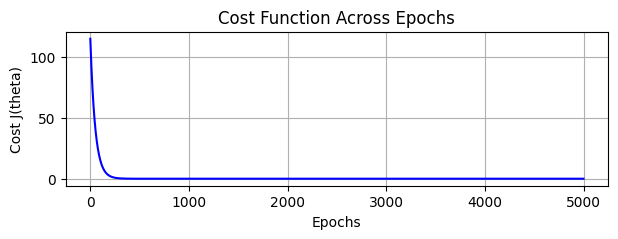

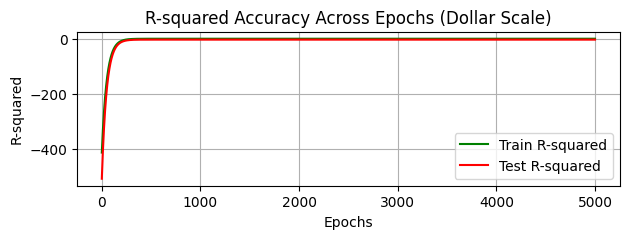

In [37]:
#Plots
#Cost function value accross the epochs
plt.figure(figsize=(7, 2))
plt.plot(range(N_ITERATIONS), cost_history, color='blue')
plt.title('Cost Function Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost J(theta)')
plt.grid(True)
plt.show() 

#plot of accuracy aacross the epochs
plt.figure(figsize=(7, 2))
plt.plot(range(N_ITERATIONS), accuracy_train_history, label='Train R-squared', color='green')
plt.plot(range(N_ITERATIONS), accuracy_test_history, label='Test R-squared', color='red')
plt.title('R-squared Accuracy Across Epochs (Dollar Scale)')
plt.xlabel('Epochs')
plt.ylabel('R-squared')
plt.legend()
plt.grid(True)
plt.show()
